In [1]:
!pip install nltk
!pip install unidecode

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 21.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 21.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
from encodings.utf_8 import encode
from time import sleep
import pandas as pd
import unidecode
from matplotlib import pyplot as plt #para plotar os gráficos
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#from selenium import webdriver
#from selenium.webdriver.firefox.service import Service
#from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import re


texto = pd.read_csv("final23.txt", sep='\n')

for i in texto:
    print(i)


resultado


In [3]:
linhas = texto.values.tolist()

In [4]:
print(linhas)

[['O Brasil é um país único. Ontem Bolsonaro disse que só ganhei as eleições porque o povo nordestino é analfabeto. Quem tem uma gota de sangue nordestino não pode votar nesse sujeito. Os nordestinos estão em todo o Brasil, trabalham e constroem esse país.'], ['Em São Bernardo, onde tudo começou, com Fernando Haddad, Geraldo Alckmin e Guilherme Boulos, iniciando nossa caminhada no segundo turno. Vamos juntos, por São Paulo, pelo Brasil, pelo nosso povo. #equipeLula #BrasilDaEsperança'], ['Lula e Haddad em caminhada em São Bernardo do Campo'], ['Não é verdade que o candidato do PT à Presidência, Luiz Inácio Lula da Silva, propõe a criação de banheiros infantis unissex se for eleito, conforme insinuam postagens nas redes sociais. Não há qualquer menção a essa proposta nas diretrizes da chapa petista registradas no TSE (Tribunal Superior Eleitoral), e a campanha do ex-presidente desmentiu a alegação. As publicações mostram uma placa de Campinas (SP), onde as escolas infantis contam com ba

In [5]:
postes = []
for dados in linhas:
    for posts in dados:
        posts = unidecode.unidecode(posts)
        posts = posts.lower().replace("... ver mais", "")
        postes.append(posts) 

In [6]:
postes

['o brasil e um pais unico. ontem bolsonaro disse que so ganhei as eleicoes porque o povo nordestino e analfabeto. quem tem uma gota de sangue nordestino nao pode votar nesse sujeito. os nordestinos estao em todo o brasil, trabalham e constroem esse pais.',
 'em sao bernardo, onde tudo comecou, com fernando haddad, geraldo alckmin e guilherme boulos, iniciando nossa caminhada no segundo turno. vamos juntos, por sao paulo, pelo brasil, pelo nosso povo. #equipelula #brasildaesperanca',
 'lula e haddad em caminhada em sao bernardo do campo',
 'nao e verdade que o candidato do pt a presidencia, luiz inacio lula da silva, propoe a criacao de banheiros infantis unissex se for eleito, conforme insinuam postagens nas redes sociais. nao ha qualquer mencao a essa proposta nas diretrizes da chapa petista registradas no tse (tribunal superior eleitoral), e a campanha do ex-presidente desmentiu a alegacao. as publicacoes mostram uma placa de campinas (sp), onde as escolas infantis contam com banhei

In [7]:
coun_vect = CountVectorizer()
count_matrix = coun_vect.fit_transform(postes)
count_array = count_matrix.toarray()
df = pd.DataFrame(data=count_array,columns = coun_vect.get_feature_names())
df

,05,06,07,10,100,11,12,13,14,16,...,votacao,votam,votar,votarei,vote13,voto,votos,yanomami,zema,zona
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(postes)
vectorizer.get_feature_names()
X_Array = X.toarray()
df1 = pd.DataFrame(data=X_Array,columns = vectorizer.get_feature_names())
df1
#df1.to_csv("TFIDF.csv", encoding = "utf-8", index = False)

,05,06,07,10,100,11,12,13,14,16,...,votacao,votam,votar,votarei,vote13,voto,votos,yanomami,zema,zona
0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.00000,0.0,0.167682,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
1,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
2,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
3,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
4,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
5,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
6,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
7,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.00000,0.0,0.226051,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
8,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
9,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.245395,0.000000,0.0,...,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000


In [9]:
divisao = df1/df
divisao.fillna(0)

,05,06,07,10,100,11,12,13,14,16,...,votacao,votam,votar,votarei,vote13,voto,votos,yanomami,zema,zona
0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.00000,0.0,0.167682,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
1,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
2,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
3,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
4,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
5,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
6,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
7,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.00000,0.0,0.226051,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
8,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
9,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.245395,0.000000,0.0,...,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000


In [10]:
dataset = X_Array

In [11]:
# determining the maximum number of clusters 
# using the simple method
limit = int((dataset.shape[0]//2)**0.5)
  
# selecting optimal value of 'k'
# using elbow method
  
# wcss - within cluster sum of
# squared distances
wcss = {}
  
for k in range(2,limit+1):
    model = KMeans(n_clusters=k)
    model.fit(dataset)
    wcss[k] = model.inertia_      


In [12]:
keys = wcss.keys() 

In [13]:
values = wcss.values()

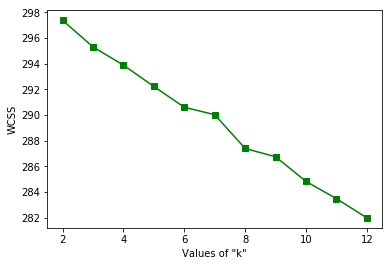

In [14]:
# plotting the wcss values
# to find out the elbow value
plt.plot(keys, values, 'gs-')
plt.xlabel('Values of "k"')
plt.ylabel('WCSS')
plt.show()

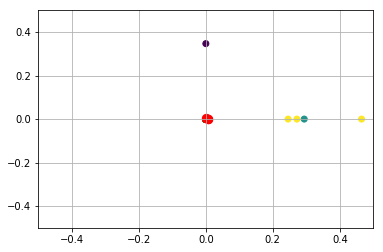

In [15]:
kmeans = KMeans(n_clusters = 3, #numero de clusters
                
init = 'k-means++', n_init = 10, #algoritmo que define a posição dos clusters de maneira mais assertiva

max_iter = 300) #numero máximo de iterações

pred_y = kmeans.fit_predict(dataset)

plt.scatter(dataset[:,1], dataset[:,0], c = pred_y) #posicionamento dos eixos x e y
plt.xlim(-0.5, 0.5) #range do eixo x
plt.ylim(-0.5, 0.5) #range do eixo y
plt.grid() #função que desenha a grade no nosso gráfico
plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,0], s = 70, c = 'red') #posição de cada centroide no gráfico
plt.show()

In [16]:
kmeans.labels_

array([2, 2, 2, 2, 1, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 1, 2, 1, 0, 2,
       0, 0, 0, 0, 2, 0, 2, 1, 0, 2, 1, 0, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       1, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 1, 0, 2, 2, 0, 2, 1, 2, 1, 2, 1,
       0, 0, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0,
       0, 0, 0, 0, 2, 1, 2, 0, 0, 1, 0, 2, 0, 2, 0, 2, 2, 2, 1, 1, 0, 2,
       2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 2, 1, 0, 2, 0,
       2, 0, 1, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 1, 0, 2, 2, 1,
       0, 0, 2, 0, 1, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 0,
       2, 0, 1, 1, 0, 0, 2, 0, 0, 2, 1, 0, 2, 1, 1, 2, 2, 1, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 1, 2, 1, 2, 0, 2, 2, 0, 1,
       2, 2, 0, 2, 0, 0, 1, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 1, 0, 2, 0, 2,
       2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0,
       2, 0, 1, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2,

In [17]:
df["cluster"] = kmeans.labels_

In [18]:
df.columns

Index(['05', '06', '07', '10', '100', '11', '12', '13', '14', '16',
       ...
       'votam', 'votar', 'votarei', 'vote13', 'voto', 'votos', 'yanomami',
       'zema', 'zona', 'cluster'],
      dtype='object', length=1983)

In [19]:
df

,05,06,07,10,100,11,12,13,14,16,...,votam,votar,votarei,vote13,voto,votos,yanomami,zema,zona,cluster
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2


In [20]:
dfposts = pd.DataFrame(postes, columns=["Posts"])


In [21]:
dfposts["cluster"] = kmeans.labels_
dfposts

,Posts,cluster
0,o brasil e um pais unico. ontem bolsonaro diss...,2
1,"em sao bernardo, onde tudo comecou, com fernan...",2
2,lula e haddad em caminhada em sao bernardo do ...,2
3,nao e verdade que o candidato do pt a presiden...,2
4,sao bernardo nos deu a vitoria no 1o turno e v...,1
5,"de propina no pneu a onibus superfaturado, pas...",2
6,desinformacao circula nas redes sociais para c...,0
7,quem tiver uma gota de sangue nordestino nao p...,0
8,lula recebe apoio de politicos do psd,0
9,com fernando haddad em sao bernardo do campo. ...,2


In [25]:
dfposts[dfposts.cluster == 2].sample(5).values

array([['caminhada com paulo dantas, ronaldo lessa e o povo pelas ruas de maceio. vamos juntos por alagoas e pelo brasil! ',
        2],
       ['dom mauro morelli afirma que os seguidores arruaceiros do presidente deveriam ter sido presos em flagrante',
        2],
       ['- encontro com liderancas evangelicas da cgadb', 2],
       ['o corte no preco dos combustiveis, realizado nos ultimos meses, virou bandeira politica do presidente em busca da reeleicao',
        2],
       ['ao mexer com o bolso dos brasileiros, bolsonaro coloca em pratica uma boa estrategia para que esquecam sua gestao desastrosa da pandemia --e talvez ate mesmo sua imagem imitando pessoas morrendo sem ar (via madeleine lacsko)',
        2]], dtype=object)